Basic Setup of Pyspark.


In [ ]:
# install dependancies
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=572f26ce1230327ca10bf945e6eeb7aa23305b28384a4242aecd03227d5220cd
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [ ]:
# Install findspark
!pip install findspark

In [ ]:
# 1. Initialize Findspark:
import findspark
findspark.init()


In [ ]:
# Create a Spark Session:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("BasicQuery").getOrCreate()



In [ ]:
# Perform a Basic Query:
data = [("James", "Smith"), ("Anna", "Rose"), ("Robert", "Williams")]
columns = ["firstname", "lastname"]
df = spark.createDataFrame(data, columns)
df.show()


+---------+--------+
|firstname|lastname|
+---------+--------+
|    James|   Smith|
|     Anna|    Rose|
|   Robert|Williams|
+---------+--------+



In [ ]:
# Define a Schema and Filter Query Results
# Define a Schema:
from pyspark.sql.types import StructType, StructField, StringType
schema = StructType([
 StructField("firstname", StringType(), True),
 StructField("lastname", StringType(), True)
])
data = [("James", "Smith"), ("Anna", "Rose"), ("Robert", "Williams")]
df = spark.createDataFrame(data, schema=schema)
df.show()


+---------+--------+
|firstname|lastname|
+---------+--------+
|    James|   Smith|
|     Anna|    Rose|
|   Robert|Williams|
+---------+--------+



In [ ]:
# Filter Query Results:
filtered_df = df.filter(df.firstname == "James")
filtered_df.show()


+---------+--------+
|firstname|lastname|
+---------+--------+
|    James|   Smith|
+---------+--------+



In [ ]:
#  Create a Catalog
#  Create a Database:
spark.sql("CREATE DATABASE IF NOT EXISTS example_db")

DataFrame[]

In [ ]:
# Create a Table:
df.write.mode("overwrite").saveAsTable("example_db.names")

In [ ]:
#  Show Tables:
spark.sql("SHOW TABLES IN example_db").show()

+----------+---------+-----------+
| namespace|tableName|isTemporary|
+----------+---------+-----------+
|example_db|    names|      false|
+----------+---------+-----------+



In [ ]:
# Query Data with Apache Spark
#  Run SQL Queries:
result = spark.sql("SELECT * FROM example_db.names WHERE firstname = 'James'")
result.show()


+---------+--------+
|firstname|lastname|
+---------+--------+
|    James|   Smith|
+---------+--------+



In [ ]:
import matplotlib.pyplot as plt
pandas_df = result.toPandas()
pandas_df.plot(kind='bar', x='firstname', y='lastname')
plt.show()

TypeError: no numeric data to plot

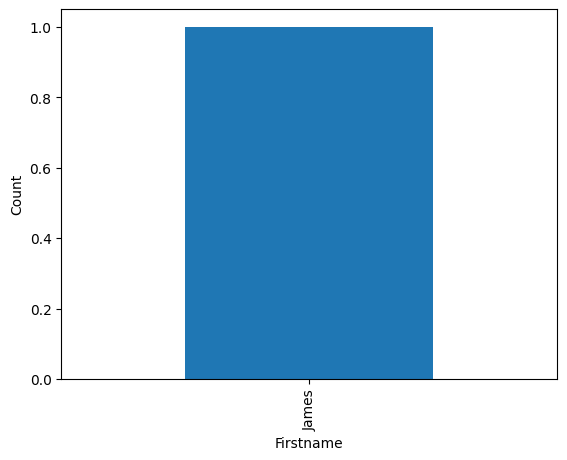

In [ ]:
# After running the code as it is in the book I run in the error above so i made modifications to the code to make it work
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas DataFrame
pandas_df = result.toPandas()

# Group by firstname and count occurrences
name_counts = pandas_df.groupby('firstname').size()

# Plot the counts
name_counts.plot(kind='bar')
plt.xlabel('Firstname')
plt.ylabel('Count')
plt.show()


**Word Count Implementation**


In [ ]:
#initialize Spark
# install dependancies
!pip install pyspark


In [ ]:
# Install findspark
!pip install findspark


In [ ]:
#nitialize Spark
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("WordCount").getOrCreate()


Mounted Drive Into Goole Colab


In [ ]:
#Load the Data:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/drive


input.txt


In [ ]:
!pwd

/content


In [ ]:
#load The Data
sc = spark.sparkContext
text_file = sc.textFile("/content/drive/MyDrive/drive/input.txt")


In [ ]:
# Implement Word Count using MapReduce
# Split each line into words
words = text_file.flatMap(lambda line: line.split(" "))

In [ ]:
# Create a tuple (word, 1) for each word
word_tuples = words.map(lambda word: (word, 1))


In [ ]:
# Reduce by key (word) to get word counts
word_counts = word_tuples.reduceByKey(lambda a, b: a + b)


In [ ]:
# Collect the results
output = word_counts.collect()
for word, count in output:
  print(f"{word}: {count}")


banana: 8
orange: 5
mango: 4
apple: 9
fruit: 9


In [ ]:
#Save the Output
word_counts.saveAsTextFile("/content/drive/MyDrive/drive/output")

**Lab Four: Implementing Clustering Techniques using Apache Spark**


In [ ]:
!pip install pyspark

In [ ]:
# Install findspark
!pip install findspark

In [ ]:
# 1. Initialize Spark:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("CyberattackClustering").getOrCreate()

In [ ]:
#Load the Data:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/drive

cyberattacks.csv  input.txt  output


In [ ]:
# Load the Data From The Drive
data = spark.read.csv("/content/drive/MyDrive/drive/cyberattacks.csv", header=True, inferSchema=True)
data.show(5)


+--------------------+-----------------+----------------------+-----------+----------------+---------------+-------------+-----------+-------------+--------------------+------------------+------------------+---------------+-----------+----------------+------------+--------------+----------------+--------------------+---------------+-----------------+-----------------+-------------+--------------+----------+
|           Timestamp|Source IP Address|Destination IP Address|Source Port|Destination Port|       Protocol|Packet Length|Packet Type| Traffic Type|        Payload Data|Malware Indicators|    Anomaly Scores|Alerts/Warnings|Attack Type|Attack Signature|Action Taken|Severity Level|User Information|  Device Information|Network Segment|Geo-location Data|Proxy Information|Firewall Logs|IDS/IPS Alerts|Log Source|
+--------------------+-----------------+----------------------+-----------+----------------+---------------+-------------+-----------+-------------+--------------------+---------

In [ ]:
from pyspark.ml.feature import VectorAssembler
# Selecting relevant columns for clustering
feature_columns = ["Source Port", "Destination Port", "Packet Length", "Anomaly Scores", "Severity Level"]
# Assemble features into a single vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
dataset = assembler.transform(data)
dataset.show(5)

IllegalArgumentException: Data type string of column Source Port is not supported.
Data type string of column Destination Port is not supported.
Data type string of column Packet Length is not supported.
Data type string of column Anomaly Scores is not supported.
Data type string of column Severity Level is not supported.

In [ ]:
from pyspark.sql.types import IntegerType, FloatType
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler

# Cast string columns to appropriate numeric types
for column in ["Source Port", "Destination Port", "Packet Length", "Severity Level"]:
    data = data.withColumn(column, col(column).cast(IntegerType()))
data = data.withColumn("Anomaly Scores", col("Anomaly Scores").cast(FloatType()))

# Fill nulls in relevant columns with 0
data = data.fillna(0, subset=["Source Port", "Destination Port", "Packet Length", "Anomaly Scores", "Severity Level"])

# Verify the schema to ensure all columns are numeric
data.printSchema()

# Selecting relevant columns for clustering
feature_columns = ["Source Port", "Destination Port", "Packet Length", "Anomaly Scores", "Severity Level"]



root
 |-- Timestamp: string (nullable = true)
 |-- Source IP Address: string (nullable = true)
 |-- Destination IP Address: string (nullable = true)
 |-- Source Port: integer (nullable = true)
 |-- Destination Port: integer (nullable = true)
 |-- Protocol: string (nullable = true)
 |-- Packet Length: integer (nullable = true)
 |-- Packet Type: string (nullable = true)
 |-- Traffic Type: string (nullable = true)
 |-- Payload Data: string (nullable = true)
 |-- Malware Indicators: string (nullable = true)
 |-- Anomaly Scores: float (nullable = false)
 |-- Alerts/Warnings: string (nullable = true)
 |-- Attack Type: string (nullable = true)
 |-- Attack Signature: string (nullable = true)
 |-- Action Taken: string (nullable = true)
 |-- Severity Level: integer (nullable = true)
 |-- User Information: string (nullable = true)
 |-- Device Information: string (nullable = true)
 |-- Network Segment: string (nullable = true)
 |-- Geo-location Data: string (nullable = true)
 |-- Proxy Information

In [ ]:
# Assemble features into a single vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
dataset = assembler.transform(data)

# Display the dataset
dataset.show(5)

+--------------------+-----------------+----------------------+-----------+----------------+---------------+-------------+-----------+-------------+--------------------+------------------+--------------+---------------+-----------+----------------+------------+--------------+----------------+--------------------+---------------+-----------------+-----------------+-------------+--------------+----------+--------------------+
|           Timestamp|Source IP Address|Destination IP Address|Source Port|Destination Port|       Protocol|Packet Length|Packet Type| Traffic Type|        Payload Data|Malware Indicators|Anomaly Scores|Alerts/Warnings|Attack Type|Attack Signature|Action Taken|Severity Level|User Information|  Device Information|Network Segment|Geo-location Data|Proxy Information|Firewall Logs|IDS/IPS Alerts|Log Source|            features|
+--------------------+-----------------+----------------------+-----------+----------------+---------------+-------------+-----------+----------

In [ ]:
from pyspark.ml.clustering import KMeans
# Set the number of clusters
kmeans = KMeans(k=3, seed=1)  # Adjust k as necessary
model = kmeans.fit(dataset)



In [ ]:
# Make predictions
predictions = model.transform(dataset)
predictions.show(5)

+--------------------+-----------------+----------------------+-----------+----------------+---------------+-------------+-----------+-------------+--------------------+------------------+--------------+---------------+-----------+----------------+------------+--------------+----------------+--------------------+---------------+-----------------+-----------------+-------------+--------------+----------+--------------------+----------+
|           Timestamp|Source IP Address|Destination IP Address|Source Port|Destination Port|       Protocol|Packet Length|Packet Type| Traffic Type|        Payload Data|Malware Indicators|Anomaly Scores|Alerts/Warnings|Attack Type|Attack Signature|Action Taken|Severity Level|User Information|  Device Information|Network Segment|Geo-location Data|Proxy Information|Firewall Logs|IDS/IPS Alerts|Log Source|            features|prediction|
+--------------------+-----------------+----------------------+-----------+----------------+---------------+-------------+

In [ ]:
from pyspark.ml.evaluation import ClusteringEvaluator
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
print(f"Silhouette with squared euclidean distance = {silhouette}")

Silhouette with squared euclidean distance = 0.6796741901108755


In [ ]:
#6. View Cluster Centers: The cluster centers represent the average value of each feature for each cluster.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
  print(center)

Cluster Centers: 
[2.24154894e+04 4.78419130e+04 7.80504832e+02 2.81299307e+01
 0.00000000e+00]
[3546.30017769 3180.54511743  194.89674753    6.86508962    0.        ]
[4.92651731e+04 2.76754471e+04 7.85174197e+02 2.77335752e+01
 0.00000000e+00]
